## Query plan drawer

Takes a problem and draws queries for it 

In [6]:
problems = [(2,
  [45, 11, 40, 38],
  {(0, 2): 0, (0, 3): -3, (1, 2): -15, (1, 3): -14})]
  ## HAS 2 FOR AMOUNT OF PLANS ADDED TO THE END
  ### Needs to be adapted for n queries with n_i plans each

In [7]:
import pydot
from IPython.display import SVG
import numpy as np

In [8]:
def add_node(graph, node, label):
    graph.add_node(pydot.Node(node, label=label))

In [9]:
def add_join(graph, node, node_a, node_b):
    graph.add_node(pydot.Node(node, shape="circle", label="⋈"))
    graph.add_edge(pydot.Edge(node, node_a, color="black"))
    graph.add_edge(pydot.Edge(node, node_b, color="black"))
    

In [10]:
def add_edge(graph, node_a, node_b):
    graph.add_edge(pydot.Edge(node_a, node_b, color="black"))

In [11]:
def add_select(graph, node, node_a):
    graph.add_node(pydot.Node(node, shape="circle", label="π"))
    graph.add_edge(pydot.Edge(node, node_a, color="black"))

In [12]:
def create_graph(name, center=True):
    return pydot.Dot(name, graph_type="graph", bgcolor="transparent", label=name, center=center)

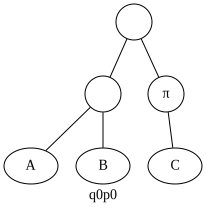

In [13]:
graph = create_graph("q0p0")
add_node(graph, "a", "A")
add_node(graph, "b", "B")
add_join(graph, "jab", "a", "b")
add_node(graph, "c", "C")
add_select(graph, "sc", "c")
add_join(graph, "jjabsc", "jab", "sc")

SVG(graph.create_svg())

In [44]:
tables_per_query = []
table_factor = 7
for i in range(problems[0][0]):
    max_cost_of_query = np.amax([problems[0][1][i*2],problems[0][1][i*2+1]])
    tables_per_query.append(int(max_cost_of_query/table_factor))
print(tables_per_query)
    

[6, 5]


In [52]:
savings_factor = 3
avg_savings = np.ceil(np.abs(np.average(list(problems[0][2].values())))/savings_factor)
avg_savings

3.0

In [75]:
#chr(65) == 'A'
tables = []
for i, v in enumerate(tables_per_query):
    t = []
    copies = 0
    offset = 0
    for j in range(v):
        while len(t) < v:
            if i == 0:
                t.append(chr(65+j))
                break
            else:
                if chr(65+j+offset) in tables[i-1]:
                    if copies < avg_savings:
                        t.append(chr(65+j+offset))
                        copies += 1
                        break
                    else:
                        offset += 1
                else:
                    t.append(chr(65+j+offset))
                    break
    tables.append(t)
print(tables)

[['A', 'B', 'C', 'D', 'E', 'F'], ['A', 'B', 'C', 'G', 'H']]


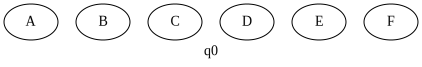

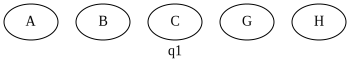

In [83]:
graphs = []
for i,t in enumerate(tables):
    g = create_graph("q"+str(i))
    for v in t:
        add_node(g, v, v)
    graphs.append(g)

for g in graphs:
    display(SVG(g.create_svg()))